# **Latihan Modul 3 PMDPM - Supervised Learning**

*   Kevin Philips Tanamas
*   220711789
*   PMDPM - A


# *Loan Dataset*

In [ ]:
# Load data dari google drive
import pandas as pd
import numpy as np

loan = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/loan_data.csv")
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [ ]:
# Data Cleansing
loan_2 = loan.drop('Loan_ID', axis=1)
loan_2.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [ ]:
# Cek perbandingan loan yang diterima dan ditolak

print(loan_2['Loan_Status'].value_counts())

Y    271
N    110
Name: Loan_Status, dtype: int64


In [ ]:
# Cek apakah ada data null, kosong, atau NaN

print("Data Null \n", loan_2.isnull().sum())
print("Data Kosong \n", loan_2.empty)
print("Data NaN \n", loan_2.isna().sum())

Data Null 
 Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64
Data Kosong 
 False
Data NaN 
 Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Drop data kosong, null, atau NaN

print("Sebelum drop missing value ", loan_2.shape)
loan_3 = loan_2.dropna(how="any", inplace = False)
print("Sesudah drop missing value ", loan_3.shape)
print(loan_3['Loan_Status'].value_counts())

Sebelum drop missing value  (381, 12)
Sesudah drop missing value  (308, 12)
Y    219
N     89
Name: Loan_Status, dtype: int64


In [ ]:
# Cek data duplikat

print("Sebelum pengecekan data duplikat ", loan_3.shape)
loan_4 = loan_3[~loan_3.duplicated(keep='last')]
print("Sesudah pengecekan data duplikat ", loan_4.shape)

Sebelum pengecekan data duplikat  (308, 12)
Sesudah pengecekan data duplikat  (308, 12)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

X = loan_4.drop(columns=['Loan_Status'])
y = loan_4['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=89)
print("Ukuran X_train ", X_train.shape)
print("Ukuran X_test ", X_test.shape)

Ukuran X_train  (215, 11)
Ukuran X_test  (93, 11)


In [ ]:
print(X_train)

     Gender Married Dependents Education Self_Employed  ApplicantIncome  \
177  Female      No          0  Graduate            No             1811   
92     Male     Yes          0  Graduate            No             4860   
350    Male     Yes          1  Graduate            No             5468   
266    Male     Yes          0  Graduate            No             5829   
178    Male      No          0  Graduate            No             3158   
..      ...     ...        ...       ...           ...              ...   
124  Female      No          0  Graduate            No             3244   
371    Male     Yes          2  Graduate           Yes             2726   
28     Male      No          0  Graduate            No             1800   
162    Male      No          0  Graduate            No             2060   
355    Male      No          0  Graduate            No             3333   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
177             1666.0     

In [ ]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Kolom Kategorik : ",cat_cols)

col_transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols), remainder='passthrough'
)

X_train_enc = col_transformer.fit_transform(X_train)
X_test_enc = col_transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=col_transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=col_transformer.get_feature_names_out())

print(df_train_enc.columns)
print(df_train_enc.head(10))
print(df_test_enc.head(10))

Kolom Kategorik :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Index(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__Married_No', 'onehotencoder__Married_Yes',
       'onehotencoder__Dependents_0', 'onehotencoder__Dependents_1',
       'onehotencoder__Dependents_2', 'onehotencoder__Dependents_3+',
       'onehotencoder__Education_Graduate',
       'onehotencoder__Education_Not Graduate',
       'onehotencoder__Self_Employed_No', 'onehotencoder__Self_Employed_Yes',
       'onehotencoder__Property_Area_Rural',
       'onehotencoder__Property_Area_Semiurban',
       'onehotencoder__Property_Area_Urban', 'remainder__ApplicantIncome',
       'remainder__CoapplicantIncome', 'remainder__LoanAmount',
       'remainder__Loan_Amount_Term', 'remainder__Credit_History'],
      dtype='object')
   onehotencoder__Gender_Female  onehotencoder__Gender_Male  \
0                           1.0                         0.0   
1    

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest
import numpy as np

pipe_KNN = Pipeline(steps=[
    ('scale', MinMaxScaler()), ('feat_select', SelectKBest()), ('clf', KNeighborsClassifier())
])

param_grid_KNN = [
    {
        'feat_select__k': np.arange(2, 6),
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance'],
        'clf__p': [1, 2]
    },
    {
        'feat_select': [SelectFromModel(estimator=DecisionTreeClassifier(random_state=89, max_depth=3))],
        'feat_select__max_features': np.arange(2, 6),
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance'],
        'clf__p': [1, 2]
    }
]

GSCV_KNN = GridSearchCV(pipe_KNN, param_grid_KNN, cv=StratifiedKFold(n_splits=5))
GSCV_KNN.fit(X_train_enc, y_train)
print("GSCV finished")


GSCV finished


Best Model : Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=3)),
                ('clf', KNeighborsClassifier(p=1))])
Selected Features : Index(['onehotencoder__Property_Area_Rural',
       'onehotencoder__Property_Area_Semiurban', 'remainder__Credit_History'],
      dtype='object')
Best CV Score : 0.84
Test Set Score : 0.67


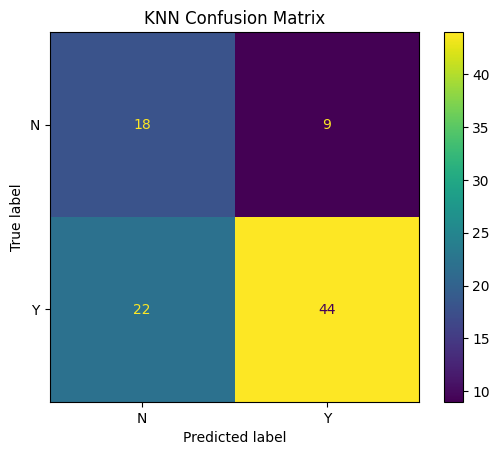

Classification Report KNN: 
               precision    recall  f1-score   support

           N       0.45      0.67      0.54        27
           Y       0.83      0.67      0.74        66

    accuracy                           0.67        93
   macro avg       0.64      0.67      0.64        93
weighted avg       0.72      0.67      0.68        93



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

mask = GSCV_KNN.best_estimator_.named_steps['feat_select'].get_support()

print("Best Model : {}".format(GSCV_KNN.best_estimator_))
print("Selected Features : {}".format(df_train_enc.columns[mask]))

print("Best CV Score : {:.2f}".format(GSCV_KNN.best_score_))
print("Test Set Score : {:.2f}".format(GSCV_KNN.score(X_test_enc, y_test)))

KNN_pred = GSCV_KNN.predict(X_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, KNN_pred, labels = GSCV_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_KNN.classes_)
disp.plot()
plt.title("KNN Confusion Matrix")
plt.show()
print("Classification Report KNN: \n", classification_report(y_test, KNN_pred))

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline(steps=[
    ('feat_select', SelectKBest()), ('clf', DecisionTreeClassifier(random_state=89))
])

param_grid_DT = [
    {
        'feat_select__k' : np.arange(2,6),
        'clf__max_depth' : [2,3,4,5],
        'clf__criterion' : ['gini', 'entropy']
    },
    {
        'feat_select' : [SelectFromModel(estimator=DecisionTreeClassifier(random_state=89, max_depth=3))],
        'feat_select__max_features' : np.arange(2,6),
        'clf__max_depth' : [2,3,4,5],
        'clf__criterion' : ['gini', 'entropy']
    }
]

GSCV_DT = GridSearchCV(pipe_DT, param_grid_DT, cv=StratifiedKFold(n_splits=5))
GSCV_DT.fit(X_train_enc, y_train)
print("GSCV Finished")

GSCV Finished


Best Model : Pipeline(steps=[('feat_select', SelectKBest(k=2)),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=89))])
Selected Features : Index(['onehotencoder__Property_Area_Semiurban', 'remainder__Credit_History'], dtype='object')
Best CV Score : 0.84
Test Set Score : 0.83


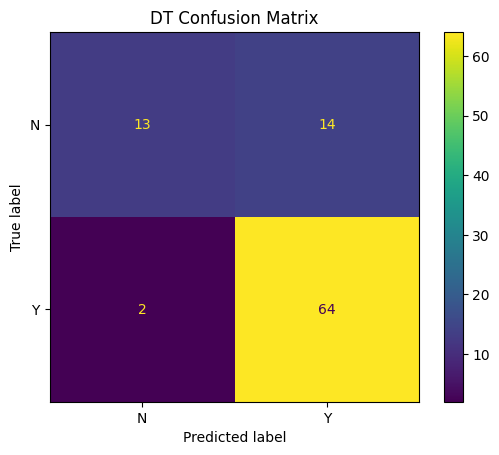

Classification Report DT: 
               precision    recall  f1-score   support

           N       0.87      0.48      0.62        27
           Y       0.82      0.97      0.89        66

    accuracy                           0.83        93
   macro avg       0.84      0.73      0.75        93
weighted avg       0.83      0.83      0.81        93



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

mask = GSCV_DT.best_estimator_.named_steps['feat_select'].get_support()

print("Best Model : {}".format(GSCV_DT.best_estimator_))
print("Selected Features : {}".format(df_train_enc.columns[mask]))

print("Best CV Score : {:.2f}".format(GSCV_DT.best_score_))
print("Test Set Score : {:.2f}".format(GSCV_DT.score(X_test_enc, y_test)))

DT_pred = GSCV_DT.predict(X_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, DT_pred, labels = GSCV_DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_DT.classes_)
disp.plot()
plt.title("DT Confusion Matrix")
plt.show()
print("Classification Report DT: \n", classification_report(y_test, DT_pred))

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

pipe_GBT = Pipeline(steps=[
    ('scale', MinMaxScaler()), ('feat_select', SelectKBest()), ('clf', GradientBoostingClassifier(random_state=89))
])

param_grid_GBT = [
    {
        'feat_select__k': np.arange(2, 6),
        'clf__n_estimators' : [100,150],
        'clf__learning_rate' : [0.01, 0.1, 1]
    },
    {
        'feat_select': [SelectFromModel(estimator=DecisionTreeClassifier(random_state=89, max_depth=3))],
        'feat_select__max_features': np.arange(2, 6),
        'clf__n_estimators' : [100,150],
        'clf__learning_rate' : [0.01, 0.1, 1]
    }
]

GSCV_GBT = GridSearchCV(pipe_GBT, param_grid_GBT, cv=StratifiedKFold(n_splits=5))
GSCV_GBT.fit(X_train_enc, y_train)
print("GSCV finished")


GSCV finished


Best Model : Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=2)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            random_state=89))])
Selected Features : Index(['onehotencoder__Property_Area_Semiurban', 'remainder__Credit_History'], dtype='object')
Best CV Score : 0.84
Test Set Score : 0.83


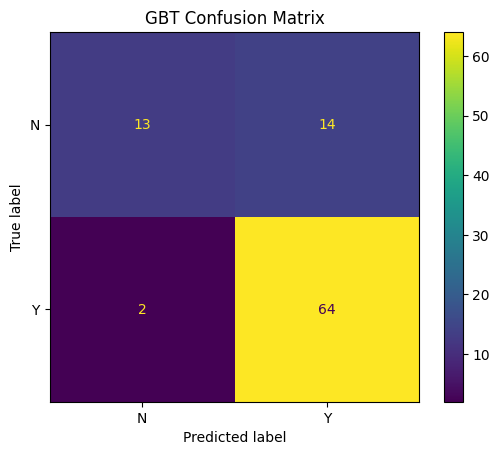

Classification Report GBT: 
               precision    recall  f1-score   support

           N       0.87      0.48      0.62        27
           Y       0.82      0.97      0.89        66

    accuracy                           0.83        93
   macro avg       0.84      0.73      0.75        93
weighted avg       0.83      0.83      0.81        93



In [86]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

mask = GSCV_GBT.best_estimator_.named_steps['feat_select'].get_support()

print("Best Model : {}".format(GSCV_GBT.best_estimator_))
print("Selected Features : {}".format(df_train_enc.columns[mask]))

print("Best CV Score : {:.2f}".format(GSCV_GBT.best_score_))
print("Test Set Score : {:.2f}".format(GSCV_GBT.score(X_test_enc, y_test)))

GBT_pred = GSCV_GBT.predict(X_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, GBT_pred, labels = GSCV_GBT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_GBT.classes_)
disp.plot()
plt.title("GBT Confusion Matrix")
plt.show()
print("Classification Report GBT: \n", classification_report(y_test, GBT_pred))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline(steps=[
    ('feat_select', SelectKBest()), ('clf', RandomForestClassifier(random_state=89))
])

param_grid_RF = [
    {
        'feat_select__k' : np.arange(2,6),
        'clf__n_estimators' : [50, 100, 150, 200],
        'clf__max_depth' : [2,3,4,5],
        'clf__criterion' : ['gini', 'entropy']
    },
    {
        'feat_select' : [SelectFromModel(estimator=DecisionTreeClassifier(random_state=89, max_depth=3))],
        'feat_select__max_features' : np.arange(2,6),
        'clf__n_estimators' : [50,100,150,200],
        'clf__max_depth' : [2,3,4,5],
        'clf__criterion' : ['gini', 'entropy']
    }
]

GSCV_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=StratifiedKFold(n_splits=5))
GSCV_RF.fit(X_train_enc, y_train)
print("GSCV Finished")

GSCV Finished


Best Model : Pipeline(steps=[('feat_select', SelectKBest(k=2)),
                ('clf',
                 RandomForestClassifier(max_depth=2, n_estimators=50,
                                        random_state=89))])
Selected Features : Index(['onehotencoder__Property_Area_Semiurban', 'remainder__Credit_History'], dtype='object')
Best CV Score : 0.84
Test Set Score : 0.83


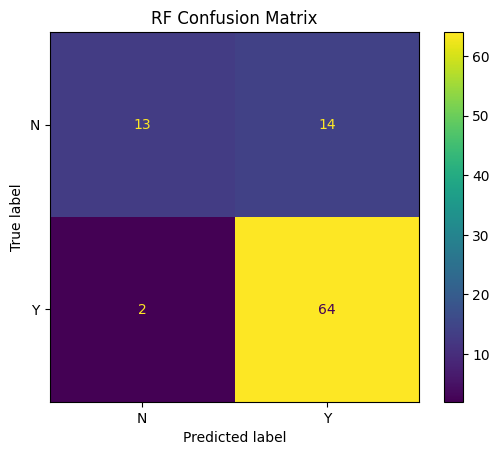

Classification Report RF: 
               precision    recall  f1-score   support

           N       0.87      0.48      0.62        27
           Y       0.82      0.97      0.89        66

    accuracy                           0.83        93
   macro avg       0.84      0.73      0.75        93
weighted avg       0.83      0.83      0.81        93



In [87]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

mask = GSCV_RF.best_estimator_.named_steps['feat_select'].get_support()

print("Best Model : {}".format(GSCV_RF.best_estimator_))
print("Selected Features : {}".format(df_train_enc.columns[mask]))

print("Best CV Score : {:.2f}".format(GSCV_RF.best_score_))
print("Test Set Score : {:.2f}".format(GSCV_RF.score(X_test_enc, y_test)))

RF_pred = GSCV_RF.predict(X_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, RF_pred, labels = GSCV_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()
plt.title("RF Confusion Matrix")
plt.show()
print("Classification Report RF: \n", classification_report(y_test, RF_pred))

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np

pipe_LogReg = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', LogisticRegression(solver='liblinear', max_iter=10000))
])

param_grid_LogReg = [
    {
        'feat_select__k': np.arange(2, 6),
        'clf__C': [0.001, 0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
    {
        'feat_select': [SelectFromModel(estimator=DecisionTreeClassifier(random_state=89, max_depth=3))],
        'feat_select__max_features': np.arange(2, 6),
        'clf__C': [0.001, 0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    }
]

GSCV_LogReg = GridSearchCV(pipe_LogReg, param_grid_LogReg, cv=StratifiedKFold(n_splits=5))
GSCV_LogReg.fit(X_train_enc, y_train)
print("GSCV Finished")


GSCV Finished


Best Model : Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=2)),
                ('clf',
                 LogisticRegression(C=0.1, max_iter=10000, penalty='l1',
                                    solver='liblinear'))])
Selected Features : Index(['onehotencoder__Property_Area_Semiurban', 'remainder__Credit_History'], dtype='object')
Best CV Score : 0.84
Test Set Score : 0.83


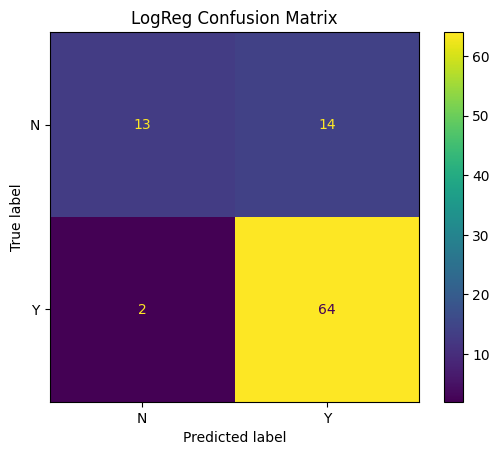

Classification Report LogReg: 
               precision    recall  f1-score   support

           N       0.87      0.48      0.62        27
           Y       0.82      0.97      0.89        66

    accuracy                           0.83        93
   macro avg       0.84      0.73      0.75        93
weighted avg       0.83      0.83      0.81        93



In [91]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

mask = GSCV_LogReg.best_estimator_.named_steps['feat_select'].get_support()

print("Best Model : {}".format(GSCV_LogReg.best_estimator_))
print("Selected Features : {}".format(df_train_enc.columns[mask]))

print("Best CV Score : {:.2f}".format(GSCV_LogReg.best_score_))
print("Test Set Score : {:.2f}".format(GSCV_LogReg.score(X_test_enc, y_test)))

LogReg_pred = GSCV_LogReg.predict(X_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, LogReg_pred, labels = GSCV_LogReg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_LogReg.classes_)
disp.plot()
plt.title("LogReg Confusion Matrix")
plt.show()
print("Classification Report LogReg: \n", classification_report(y_test, LogReg_pred))

In [92]:
# SVC

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, RFE

pipe_SVC = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', SVC(class_weight='balanced'))
])

param_grid_SVC = [
    {
        'feat_select__k': np.arange(2, 6),
        'clf__kernel' : ['poly', 'rbf'],
        'clf__C' : [0.001, 0.01, 0.1, 1, 10],
        'clf__C' : [0.001, 0.01, 0.1, 1, 10]
    },
    {
        'feat_select': [SelectFromModel(estimator=DecisionTreeClassifier(random_state=89, max_depth=3))],
        'feat_select__max_features': np.arange(2, 6),
        'clf__kernel' : ['poly', 'rbf'],
        'clf__C' : [0.001, 0.01, 0.1, 1, 10],
        'clf__C' : [0.001, 0.01, 0.1, 1, 10]
    }
]

GSCV_SVC = GridSearchCV(pipe_SVC, param_grid_SVC, cv=StratifiedKFold(n_splits=5))
GSCV_SVC.fit(X_train_enc, y_train)
print("GSCV Finished")

GSCV Finished


Best Model : Pipeline(steps=[('scale', MinMaxScaler()),
                ('feat_select',
                 SelectFromModel(estimator=DecisionTreeClassifier(max_depth=3,
                                                                  random_state=89),
                                 max_features=2)),
                ('clf', SVC(C=0.01, class_weight='balanced', kernel='poly'))])
Selected Features : Index(['remainder__CoapplicantIncome', 'remainder__Credit_History'], dtype='object')
Best CV Score : 0.84
Test Set Score : 0.83


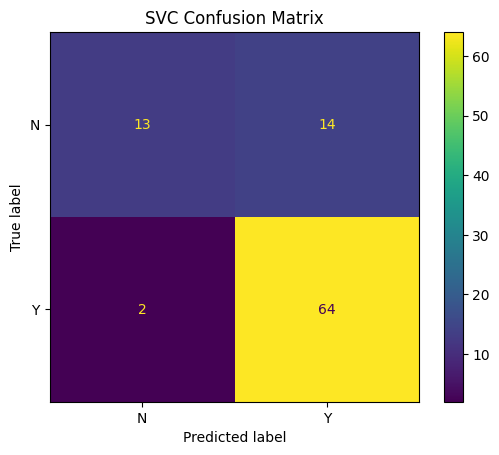

Classification Report SVC: 
               precision    recall  f1-score   support

           N       0.87      0.48      0.62        27
           Y       0.82      0.97      0.89        66

    accuracy                           0.83        93
   macro avg       0.84      0.73      0.75        93
weighted avg       0.83      0.83      0.81        93



In [96]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

mask = GSCV_SVC.best_estimator_.named_steps['feat_select'].get_support()

print("Best Model : {}".format(GSCV_SVC.best_estimator_))
print("Selected Features : {}".format(df_train_enc.columns[mask]))

print("Best CV Score : {:.2f}".format(GSCV_SVC.best_score_))
print("Test Set Score : {:.2f}".format(GSCV_SVC.score(X_test_enc, y_test)))

SVC_pred = GSCV_SVC.predict(X_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, SVC_pred, labels = GSCV_SVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_SVC.classes_)
disp.plot()
plt.title("SVC Confusion Matrix")
plt.show()
print("Classification Report SVC: \n", classification_report(y_test, SVC_pred))

# *Insurance Dataset*

In [97]:
# Load data dari google drive
import pandas as pd
import numpy as np

df_insurance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/insurance.csv")
df_insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<Axes: >

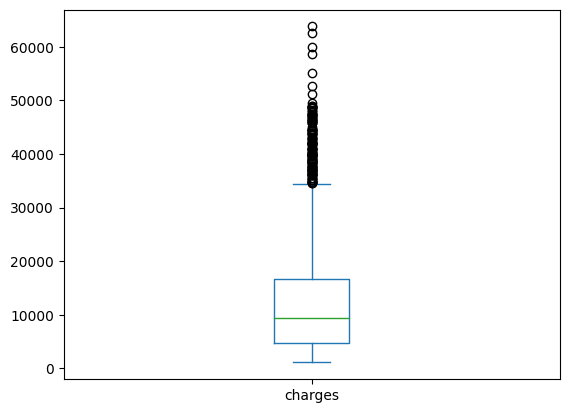

In [98]:
# Data Cleansing - Melihat sebaran data menggunakan box
df_insurance.charges.plot(kind='box')

Jumlah baris DataFrame sebelum dibuang outlier 1338
Jumlah baris DataFrame sesudah dibuang outlier 1338


<Axes: >

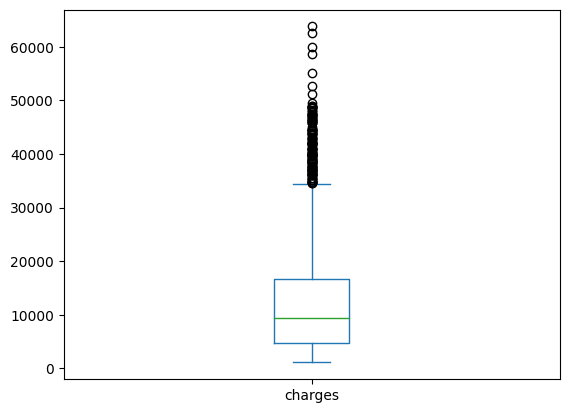

In [99]:
# Fungsi pembersihan outlier dengan metode inter-quartile range
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_in):
  for col_name in list(df_in.columns):
    if is_numeric_dtype(df_in[col_name]):
      q1 = df_in[col_name].quantile(0.25)
      q3 = df_in[col_name].quantile(0.75)

      iqr = q3 - q1
      batas_atas = q3 + (iqr * 1.5)
      batas_bawah = q1 - (iqr * 1.5)

      df_out = df_in.loc[(df_in[col_name]>=batas_bawah) & (df_in[col_name]<=batas_atas)]
      return df_out

df_insurance_clean = remove_outlier(df_insurance)
print("Jumlah baris DataFrame sebelum dibuang outlier", df_insurance.shape[0])
print("Jumlah baris DataFrame sesudah dibuang outlier", df_insurance_clean.shape[0])
df_insurance_clean.charges.plot(kind='box')

In [100]:
# Train-test split
from sklearn.model_selection import train_test_split

X_regress = df_insurance_clean.drop('charges', axis=1)
y_regress = df_insurance_clean.charges

X_train_ins, X_test_ins, y_train_ins, y_test_ins = train_test_split(X_regress, y_regress, test_size = 0.25, random_state = 89)

In [101]:
# Encoding beberapa feature kategorikal
# Menampilkan 10 data terateas dari masing-masing DataFrame
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = X_train_ins.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategori: ", cat_cols)

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols), remainder='passthrough'
)

X_train_enc = transformer.fit_transform(X_train_ins)
X_test_enc = transformer.transform(X_test_ins)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

Kolom kategori:  ['sex', 'smoker', 'region']


,onehotencoder__sex_female,onehotencoder__sex_male,onehotencoder__smoker_no,onehotencoder__smoker_yes,onehotencoder__region_northeast,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest,remainder__age,remainder__bmi,remainder__children
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,28.0,33.400,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,53.0,39.600,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49.0,27.170,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,55.0,25.365,3.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,57.0,40.370,0.0
5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,46.0,24.795,3.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,47.0,29.830,3.0
7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,30.250,0.0
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,25.460,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,21.700,0.0


In [102]:
# Linear Regression, Pipeline, dan GSCV
# Menampilkan Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

pipe_LR = Pipeline(steps=[
    ('scale', StandardScaler()), ('reg', LinearRegression())
])

param_grid_LR = {
}

GSCV_LR = GridSearchCV(pipe_LR, param_grid_LR, cv=5, scoring='neg_mean_squared_error')
GSCV_LR.fit(X_train_enc, y_train_ins)

print("Best model : {}".format(GSCV_LR.best_estimator_))
print("Koefisien/Bobot : {}".format(GSCV_LR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/Bias : {}".format(GSCV_LR.best_estimator_.named_steps['reg'].intercept_))

LR_pred = GSCV_LR.predict(X_test_enc)

mae_LR = mean_absolute_error(y_test_ins, LR_pred)
mse_LR = mean_squared_error(y_test_ins, LR_pred)

print("LR MAE : ", mae_LR)
print("LR MSE : ", mse_LR)
print("LR Root Mean Squared Error : ", np.sqrt(mse_LR))

Best model : Pipeline(steps=[('scale', StandardScaler()), ('reg', LinearRegression())])
Koefisien/Bobot : [-4.64967149e+15 -4.64967149e+15 -5.72534890e+16 -5.72534890e+16
 -7.79733879e+16 -7.57930267e+16 -7.90212552e+16 -7.55724911e+16
  3.54526562e+03  2.02053125e+03  6.53234375e+02]
Intercept/Bias : 12693.094856207774
LR MAE :  4555.0539894756175
LR MSE :  41240046.785859585
LR Root Mean Squared Error :  6421.841385915693


In [103]:
# Dataframe untuk memuat nilai asli dari test set dan hasil prediksi Model Linear Regression

df_results = pd.DataFrame(y_test_ins)
df_results['LR Prediction'] = LR_pred
df_results.head(10)

,charges,LR Prediction
290,3172.01800,4985.184585
651,10579.71100,14159.946507
118,8601.32930,8530.958982
255,13047.33235,12024.302493
1166,10982.50130,15146.452591
963,9500.57305,9781.644188
357,9620.33070,11871.792950
503,32548.34050,25191.575875
529,1708.00140,1301.854573
362,13844.50600,21856.821628


In [104]:
# Ridge Regression
# Menampilkan best model, nilai koefisien yang diperoleh dengan menggunakan atribut coef dan nilai intercept
# Menampilkan Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

pipe_Ridge = Pipeline(steps=[
    ('scale', StandardScaler()), ('reg', Ridge())
])

param_grid_Ridge = {
    'reg__alpha' : [0.01, 0.1, 1, 10, 100]
}

GSCV_RR = GridSearchCV(pipe_Ridge, param_grid_Ridge, cv=5, scoring='neg_mean_squared_error', error_score='raise')
GSCV_RR.fit(X_train_enc, y_train_ins)

print("Best Model : {}".format(GSCV_RR.best_estimator_))
print("Koefisien/Bobot : {}".format(GSCV_RR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/Bias : {}".format(GSCV_RR.best_estimator_.named_steps['reg'].intercept_))

Ridge_pred = GSCV_RR.predict(X_test_enc)

mse_Ridge = mean_squared_error(y_test_ins, Ridge_pred)
mae_Ridge = mean_absolute_error(y_test_ins, Ridge_pred)

print("Ridge MAE : ", mae_LR)
print("Ridge MSE : ", mse_LR)
print("Ridge Root Mean Squared Error : ", np.sqrt(mse_Ridge))

Best Model : Pipeline(steps=[('scale', StandardScaler()), ('reg', Ridge(alpha=10))])
Koefisien/Bobot : [  -45.7537176     45.7537176  -4532.54470416  4532.54470416
   212.7024191    274.43860631  -313.87423139  -166.50139397
  3522.28957264  1970.30491379   681.63478968]
Intercept/Bias : 12678.23767416649
Ridge MAE :  4555.0539894756175
Ridge MSE :  41240046.785859585
Ridge Root Mean Squared Error :  6428.696688615871


In [105]:
# Menampilkan hasil prediksi model Ridge Regression

df_results['Ridge Prediction']= Ridge_pred
df_results.head(10)

,charges,LR Prediction,Ridge Prediction
290,3172.01800,4985.184585,5278.674629
651,10579.71100,14159.946507,13797.949615
118,8601.32930,8530.958982,8253.682851
255,13047.33235,12024.302493,12055.396080
1166,10982.50130,15146.452591,14675.344220
963,9500.57305,9781.644188,9791.177270
357,9620.33070,11871.792950,11813.696660
503,32548.34050,25191.575875,25007.436779
529,1708.00140,1301.854573,1282.090566
362,13844.50600,21856.821628,22402.571682


In [106]:
# Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

pipe_Lasso = Pipeline(steps=[
    ('scale', StandardScaler()), ('reg', Lasso(max_iter=1000))
])

param_grid_Lasso = {
    'reg__alpha' : [0.01, 0.1, 1, 10, 100]
}

GSCV_Lasso = GridSearchCV(pipe_Lasso, param_grid_Lasso, cv=5, scoring='neg_mean_squared_error')
GSCV_Lasso.fit(X_train_enc, y_train_ins)

print("Best Model : {}".format(GSCV_Lasso.best_estimator_))
print("Koefisien/Bobot : {}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].coef_))
print("Intercept/Bias : {}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].intercept_))

Lasso_pred = GSCV_Lasso.predict(X_test_enc)

mse_Lasso = mean_squared_error(y_test_ins, Lasso_pred)
mae_Lasso = mean_absolute_error(y_test_ins, Lasso_pred)

print("Lasso MAE : ", mae_LR)
print("Lasso MSE : ", mse_LR)
print("Lasso Root Mean Squared Error : ", np.sqrt(mse_Lasso))

Best Model : Pipeline(steps=[('scale', StandardScaler()), ('reg', Lasso(alpha=10))])
Koefisien/Bobot : [-7.93725368e+01  1.23321315e-13 -9.10268716e+03  6.71013040e-14
  3.50074746e+02  4.09623071e+02 -1.66280304e+02 -2.09284520e+01
  3.54848164e+03  1.97757935e+03  6.75624582e+02]
Intercept/Bias : 12678.237674166488
Lasso MAE :  4555.0539894756175
Lasso MSE :  41240046.785859585
Lasso Root Mean Squared Error :  6418.832394066434


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.556e+08, tolerance: 1.044e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.559e+08, tolerance: 1.044e+07
  model = cd_fast.enet_coordinate_descent(


In [107]:
# Menampilkan hasil prediksi model Lasso Regression pada dataframe hasil

df_results['Lasso Prediction'] = Lasso_pred
df_results.head(10)

,charges,LR Prediction,Ridge Prediction,Lasso Prediction
290,3172.01800,4985.184585,5278.674629,5276.701599
651,10579.71100,14159.946507,13797.949615,13834.737536
118,8601.32930,8530.958982,8253.682851,8273.221167
255,13047.33235,12024.302493,12055.396080,12050.367177
1166,10982.50130,15146.452591,14675.344220,14701.183285
963,9500.57305,9781.644188,9791.177270,9744.363864
357,9620.33070,11871.792950,11813.696660,11778.591885
503,32548.34050,25191.575875,25007.436779,25046.157782
529,1708.00140,1301.854573,1282.090566,1198.446833
362,13844.50600,21856.821628,22402.571682,22465.878751


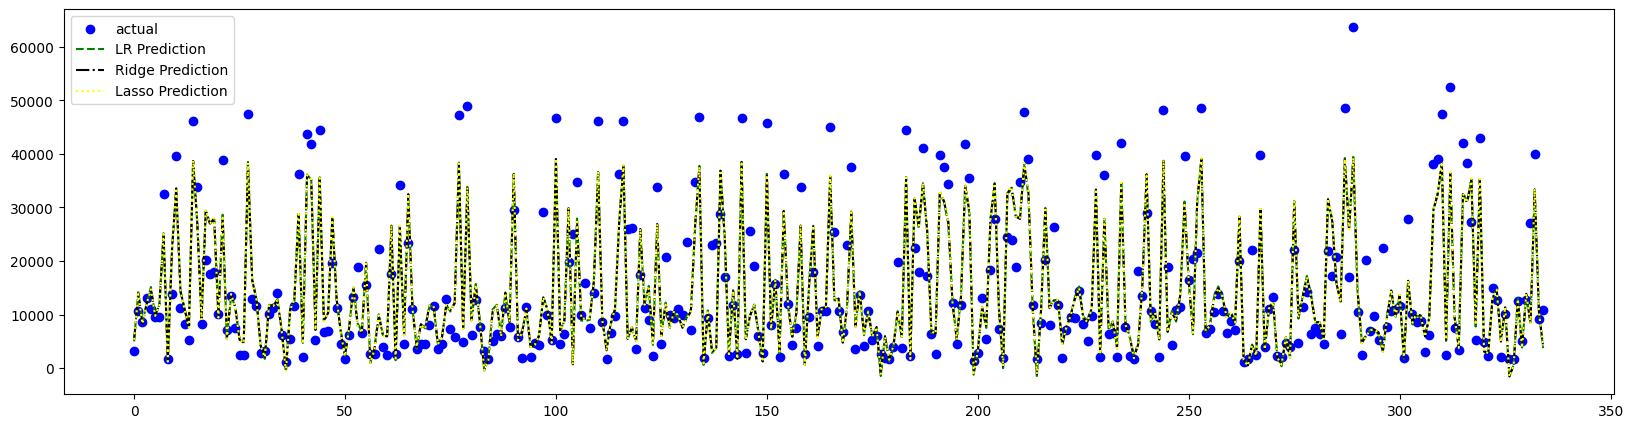

In [108]:
# Grafik perbandingan data asli dan hasil prediksi semua Regression dari dataframe hasil

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
data_len = range(len(y_test_ins))
plt.scatter(data_len, df_results.charges, color='blue', label='actual')
plt.plot(data_len, df_results['LR Prediction'], color='green', linestyle='--', label="LR Prediction")
plt.plot(data_len, df_results['Ridge Prediction'], color='black', linestyle='-.', label="Ridge Prediction")
plt.plot(data_len, df_results['Lasso Prediction'], color='yellow', linestyle=':', label="Lasso Prediction")

plt.legend()
plt.show()